In [290]:
import matplotlib
import random
import timeit
import matplotlib.pyplot as plt
import math

In [291]:
from bad_sorts import create_near_sorted_list
from good_sorts import quicksort, mergesort, heapsort

In [292]:
length = 2500          
max_value = 2**30
runs = 5 

In [293]:
max_swaps = int(length * math.log(length) / 2)
step = max(1, max_swaps // 10)
swaps_list = list(range(0, max_swaps + 1, step))
if swaps_list[-1] != max_swaps:
    swaps_list.append(max_swaps)

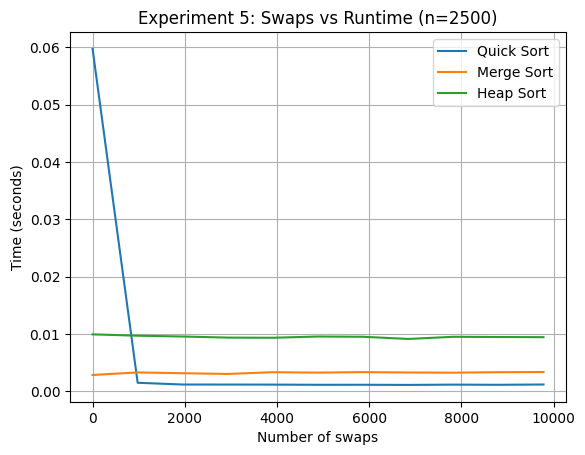

In [294]:
data_q, data_m, data_h = [], [], []

for swaps in swaps_list:
    tq = tm = th = 0

    for _ in range(runs):
        L = create_near_sorted_list(length, max_value, swaps)

        start = timeit.default_timer()
        quicksort(L.copy())
        tq += timeit.default_timer() - start

        start = timeit.default_timer()
        mergesort(L.copy())
        tm += timeit.default_timer() - start

        start = timeit.default_timer()
        heapsort(L.copy())
        th += timeit.default_timer() - start

    data_q.append(tq / runs)
    data_m.append(tm / runs)
    data_h.append(th / runs)

plt.plot(swaps_list, data_q, label='Quick Sort')
plt.plot(swaps_list, data_m, label='Merge Sort')
plt.plot(swaps_list, data_h, label='Heap Sort')
plt.title(f"Experiment 5: Swaps vs Runtime (n={length})")
plt.xlabel('Number of swaps')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.savefig("experiment5_graph.png", dpi=300)
plt.show()